In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn import metrics,ensemble
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="jumbotron">
    <h1 class="display-1">分类技术</h1>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

> 如何判断贷款者是否会拖欠贷款？

In [2]:
debtDict = {'Tid': range(10), 
            '有房者': ['是', '否', '否', '是', '否', '否', '是','否', '否', '否'], 
            '婚姻状况': ['单身', '已婚', '单身', '已婚', '离异', '已婚', '离异', '单身', '已婚', '单身'], 
            '年收入': ['125K', '100K', '70K', '120K', '95K', '60K', '220K', '85K', '75K', '90K'], 
            '拖欠贷款者': ['否', '否', '否', '否', '是', '否', '否', '是', '否', '是']}

In [3]:
pd.DataFrame(debtDict)

,Tid,有房者,婚姻状况,年收入,拖欠贷款者
0,0,是,单身,125K,否
1,1,否,已婚,100K,否
2,2,否,单身,70K,否
3,3,是,已婚,120K,否
4,4,否,离异,95K,是
5,5,否,已婚,60K,否
6,6,是,离异,220K,否
7,7,否,单身,85K,是
8,8,否,已婚,75K,否
9,9,否,单身,90K,是


## 基本概念

### 分类（classification） 

- 给定一条记录$(\boldsymbol{x}, y)$，其中，$y$是分类属性或者目标属性，$\boldsymbol{x}$是该记录预测属性的集合

- 通过学习得到一个**目标函数**（target function）$f$，把每个属性集$\boldsymbol{x}$映射到一个预先定义的**类标签**$y$

$$
y = f(\boldsymbol{x})
$$

- 目标函数也被称作**分类模型**（classification model）

#### 分类模型的功能

1. 描述性建模：识别哪些属性决定一个数据记录属于哪个类别

2. 预测性建模：根据已知的数据记录的属性，自动识别该数据记录属于的类别

#### 分类模型的适用领域

- 非常适合分类属性是**二元**或者**标称**类型的数据集

- 不适用于分类属性是**序数**或**连续**类型的数据集
    + 因为没有考虑标签之间的顺序大小关系

任务|属性集$\boldsymbol{x}$|分类属性$y$
---|---|---
分类e-mail|从e-mail的header和内容中提取的特征|垃圾邮件`or`非垃圾邮件
识别癌变细胞|通过磁共振扫描提取的特征|恶性的`or`良性的
分类星系|从天文望远镜获取的图像中提取特征|椭圆的、螺旋的、`or`不规则星系

### 建立分类模型的一般方法

<center><img src="./img/classification/classificationProcess.png" width=80%></center>

#### 训练集与检验集

- 训练集（training set）：由类标签已知的数据记录组成，用于建立分类模型

- 检验集（test set）：用来检验分类规则的数据记录集合

#### 分类算法

+ k最近邻分类
+ **决策树**
+ **随机森林**
+ 朴素贝叶斯分类
+ 逻辑回归
+ **神经网络**
+ 支持向量机

#### 混淆矩阵（confusion matrix）

- 由分类模型做出的正确和错误的分类结果构成的矩阵

- 二元分类问题的混淆矩阵

![](./img/classification/confusionMatrix.gv.svg)

#### 性能度量（performance metric）

- 汇总混淆矩阵的信息

- 准确率（accuracy）

$$
准确率=\frac{正确预测数}{预测总数}=\frac{f_{11}+f_{00}}{f_{11}+f_{10}+f_{01}+f_{00}}
$$

- 错误率（error rate）

$$
错误率=\frac{错误预测数}{预测总数}=\frac{f_{10}+f_{01}}{f_{11}+f_{10}+f_{01}+f_{00}}
$$

$$
错误率+准确率=1
$$

## 决策树

<center><img src="./img/classification/classificationSample.gv.svg" with=100%></center>

<center><img src="./img/classification/decisionTree.gv.svg" with=50%></center>

<center><img src="./img/classification/decisionTree1.gv.svg"></center>

> 对于同一个问题而言，决策树不是唯一的

### 基本概念

<center><img src="./img/classification/decisionTreeC.gv.svg" with=60%></center>

- **根结点**（root node）
    + 没有入边，但有零条或多条出边

- **内部结点**（internal node）
    + 恰有一条入边和两条或多条出边

- **叶结点**（leaf node）
    + 恰有一条入边，但没有出边
    + 又被称为终结点（terminal node）

- 每个叶结点赋予一个类标签

- 每个**非叶**结点包含属性测试的条件

### 构造决策树 

- **Hunt**算法
- CART
- ID3, C4.5
- SLIQ, SPRINT

#### Hunt算法基本思路 

假设$D_t$是一个训练集，构成一个结点$t$

- 如果$D_t$包含的所有数据对象都属于同一个类别$y_t$，那么结点$t$是一个叶结点，标记为$y_t$

- 如果$D_t$包含的数据对象属于多个类别，那么用一个属性尝试将数据对象分成子集。之后，对每个子集再递归应用以上步骤

<center><img src="./img/classification/step0.gv.svg" with=100%></center>

<center><img src="./img/classification/step1.gv.svg" width=20%></center>

<center><img src="./img/classification/step2.gv.svg" width=20%></center>

<center><img src="./img/classification/step3.gv.svg" width=20%></center>

#### 构造决策树需要考虑的问题 

- 如何选择测试条件？
    + 选择哪个属性作为分裂的条件？
    + 针对每个条件应当如何选择划分点？即，如何评估划分的优劣

- 如何停止树的增长？
    + 直到所有的数据对象都属于**相同**的类别，或都有**相同**的属性值
    + 其他方法

### 选择最佳划分

In [4]:
carDict = [
    range(1,21),
    ['男']*6+['女']*4+['男']*4+['女']*6,
    ['家用']+['运动']*8+['豪华']
    +['家用']*3+['豪华']*7,
    ['小']+['中']*2+['大']+['超大']*2+['小']*2+['中']+['大']*2+['超大']+['中']+['超大']+['小']*2
    +['中']*3+['大'],
    ['C0']*10+['C1']*10
]
cardf = pd.DataFrame(carDict,index=['ID', '性别','车型', '大小', '列别']).T

In [5]:
cardf

,ID,性别,车型,大小,列别
0,1,男,家用,小,C0
1,2,男,运动,中,C0
2,3,男,运动,中,C0
3,4,男,运动,大,C0
4,5,男,运动,超大,C0
5,6,男,运动,超大,C0
6,7,女,运动,小,C0
7,8,女,运动,小,C0
8,9,女,运动,中,C0
9,10,女,豪华,大,C0


<center><img src="./img/classification/carCustomerID.svg" width=30%></center>

<center><img src="./img/classification/carGender.svg" width=15%></center>

<center><img src="./img/classification/carType.svg" width=20%></center>

- 最佳选择划分通常根据结点的**不纯性的程度**（degree of impurity）

- 不纯的程度越低，类分布就越倾斜

#### 不纯性度量 

令$p(i|t)$表示给定结点$t$中属于类$i$的记录所占的比例，类别个数为$c$

- 熵（Entropy）

$$ \text{Entropy}(t)=-\sum_{i=0}^{c-1}p(i|t)\log_2p(i|t) $$

> ID3、C4.5算法用熵选择最佳划分

- Gini系数

$$ \text{Gini}(t)=1-\sum_{i=1}^{c-1}\left[p(i|t)\right]^2 $$

> CART算法用Gini系数选择最佳划分
- 每个非叶节点只有两个分支，形成二叉树

假设一个节点中只包含有两个类别（类别1和类别2），各自所占的比例是$p_1$和$p_2$，且$p_1+p_2=1$

[Text(0.5, 0, '$p_1$')]

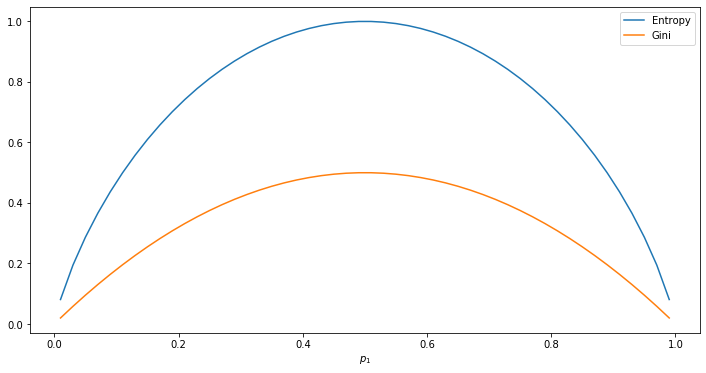

In [6]:
x = np.linspace(0.01,0.99)
x1 = np.ones(x.shape) - x
xE = -x*np.log2(x)-x1*np.log2(x1)
xG = 1-(np.power(x,2)+np.power(x1,2))
df = pd.DataFrame({'x':x,'Entropy':xE,'Gini':xG})
ax = df.plot(x='x',y='Entropy',kind='line',figsize=(12,6))
df.plot(x='x',y='Gini',kind='line',ax=ax)
ax.set(xlabel='$p_1$')

#### 确定测试条件

- 对于选择的一个测试条件，计算父结点（划分前）的不纯度与子结点（划分后）的不纯度的差，差越大，测试条件的效果就越好

### `sklearn`实现 

#### 建立模型

```python
from sklearn import tree
tree.DecisionTreeClassifier(criterion='gini'）
```
- `criterion`：`str`类型，不纯性的度量，可以是`gini`和`entropy`，默认是`gini`

- 生成的决策树的属性（Attributes）
    + `classes_ `：由类标签构成的数组
    + `n_classes_`：`int`，类别的数量
    + `tree_`：建立的决策树

- `feature_importances_`：每个属性在构造决策树中的重要性，即每个属性导致`Gini`系数的减少量（标准化）

In [7]:
from sklearn import tree
dtDebt = tree.DecisionTreeClassifier()
dtDebt

DecisionTreeClassifier()

#### 训练模型

```python
dt.fit(X, y)
```
- `X`：输入的属性矩阵，形状为`[n_samples, n_features]`
- `y`：类别标签数组，形状为`[n_samples]`

In [8]:
debt=[['是','否','否','是','否','否','是','否','否','否'],
      ['单身','已婚','单身','已婚','离异','已婚','离异','单身','已婚','单身'],
      [125,100,70,120,95,60,220,85,75,90],
      ['否','否','否','否','是','否','否','是','否','是']]
debttrain = pd.DataFrame(debt, index=['有房者','婚姻状况','年收入','拖欠贷款']).T
debttrain

,有房者,婚姻状况,年收入,拖欠贷款
0,是,单身,125,否
1,否,已婚,100,否
2,否,单身,70,否
3,是,已婚,120,否
4,否,离异,95,是
5,否,已婚,60,否
6,是,离异,220,否
7,否,单身,85,是
8,否,已婚,75,否
9,否,单身,90,是


In [9]:
dtDebt.fit(debttrain.iloc[:,:-1], debttrain.iloc[:,-1])

ValueError: could not convert string to float: '是'

#### 转变预测属性

> `DecisionTreeClassifer`只支持数值型预测属性
- 但是对类别标签没有要求

##### **One-Hot Encoding**：将标称属性转换成二元属性

```python
pandas.get_dummies(data, columns=None)
```
- `data`：`Series`类型，或者`DataFrame`类型
- `columns`：列名的`list`类型，数据集中哪些列需要转换，默认是将数据集中所有列进行转换
- 返回值：由二元化的属性构成的`DataFrame`

In [ ]:
debttrainOH = pd.get_dummies(debttrain, columns=['有房者','婚姻状况'])
debttrain
debttrainOH
debttrainY = debttrainOH.pop('拖欠贷款')
debttrainOH

In [ ]:
dtDebt.fit(debttrainOH, debttrainY)

#### 决策树可视化

##### 决策规则以文本形式输出

```python
tree.export_text(decision_tree, feature_names=None)
```
- `decision_tree`：训练过的决策树模型
- `feature_names`：由预测属性名称构成的列表

In [ ]:
print(tree.export_text(dtDebt,feature_names=list(debttrainOH.columns)))

In [ ]:
tree.plot_tree(dtDebt,filled=True,figsize=(12,6))

##### 决策规则以图形形式输出：Graphviz

- Graphviz是一个开源的流程图绘制软件
- 官方网站：[http://graphviz.org/](http://graphviz.org/)

- 下载安装
    + `Windows`系统下载`graphviz-2.38.msi`：[https://graphviz.gitlab.io/_pages/Download/Download_windows.html](https://graphviz.gitlab.io/_pages/Download/Download_windows.html)
    + `Mac`系统，参考[https://blog.csdn.net/w1573007/article/details/80117725?depth_1-utm_source=distribute.pc_relevant.none-task&utm_source=distribute.pc_relevant.none-task](https://blog.csdn.net/w1573007/article/details/80117725?depth_1-utm_source=distribute.pc_relevant.none-task&utm_source=distribute.pc_relevant.none-task)

- 将Graphviz添加到`Windows`的环境变量

<center><img src="./img/classification/graphvizPath.png" width=60%></center>

> 将`C:\Program Files (x86)\Graphviz2.38\bin\;`添加到`Path`变量值的最后，与前面的项目之间用英文`;`间隔
<center><img src="./img/classification/graphvizPath1.png" width=40%></center>

-  Python中安装Graphviz包

```python
pip install graphviz
```

##### 显示决策树

- `sklearn`中将决策树导出成为`Graphviz`图形的函数

```python
tree.export_graphviz(decision_tree, feature_names=None, class_names=None, filled=False)
```
- `decision_tree`：生成的决策树
- `feature_names`：`str`列表，由预测属性的名称构成
- `class_names`：`str`列表，给每个类别命名，依据类别对应的数值的升序排列，与`dt.classes_`显示的类别顺序一致
- `filled`：是否给节点上色，默认否

In [10]:
dotDataRaw = tree.export_graphviz(dtDebt)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
import graphviz
graphRaw = graphviz.Source(dotDataRaw)
graphRaw

In [ ]:
dotData = tree.export_graphviz(dtDebt, feature_names=debttrainOH.columns, class_names=['无拖欠','拖欠'], filled=True)
dtDebt.classes_

In [ ]:
graph = graphviz.Source(dotData)
graph

#### 用决策树预测

```python
dt.predict(X)
```
- `X`：输入的属性矩阵，形状为`[n_samples, n_features]`
- 返回值：预测的类别，形状为`[n_samples]`的数组

```python
dt.predict_proba(X)
```
- 返回值：预测属于每个类别的概率，形状为[n_samples, n_classes]的矩阵，每个样本属于每个类别的概率的顺序与`dt.classes_`一致

In [11]:
debtt = [['是','否','否','是','否'],
         ['单身','已婚','单身','已婚','离异'],
         [200,80,70,100,65]]
debttest = pd.DataFrame(debtt,index=['有房者','婚姻状况','年收入']).T 
debttestOH = pd.get_dummies(debttest, columns=['有房者','婚姻状况'])
debttestOH

,年收入,有房者_否,有房者_是,婚姻状况_单身,婚姻状况_已婚,婚姻状况_离异
0,200,0,1,1,0,0
1,80,1,0,0,1,0
2,70,1,0,1,0,0
3,100,0,1,0,1,0
4,65,1,0,0,0,1


In [12]:
dtDebt.predict(debttestOH)
dtDebt.predict_proba(debttestOH)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Titanic生存分类

#### 读取数据

In [13]:
titRawDf = pd.read_csv('./data/analysis/train.csv')
titRawDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titDf = titRawDf.loc[:,['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
titDf.set_index('PassengerId',inplace=True)
titDf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,0
2,1,female,38.0,1,0,71.2833,C,1
3,3,female,26.0,0,0,7.9250,S,1
4,1,female,35.0,1,0,53.1000,S,1
5,3,male,35.0,0,0,8.0500,S,0


#### 数据预处理

##### 删除包含缺失值的行

In [15]:
titDf.dropna(axis=0,how='any',inplace=True)

##### one-hot编码

In [16]:
titDf.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Survived      int64
dtype: object

In [17]:
titX = titDf.iloc[:,:-1]
titY = titDf['Survived']
titX.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [18]:
titXOH = pd.get_dummies(titX,columns=['Sex','Embarked'])
titXOH.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1


#### 分割训练集与测试集

```python
from sklearn.model_selection import train_test_split
train_test_split(*arrays, test_size=0.25)
```

- `*arrays`：需要被划分的数据集，可以是`lists`类型、`numpy.arrays`类型，`pandas.DataFrame`类型

- `test_size`：检验集的规模
    + `float`类型，取值范围`[0,1]`，表示检验集占原数据集的比例
    + `int`类型，表示检验集包含的数据记录的绝对数量
    + 默认为0.25

- 返回值：分割好的训练集与检验集，与输入的`*array`的类型相同

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
titTrainX,titTestX,titTrainY,titTestY = train_test_split(titXOH,titY)
titTrainX
titTestX
titTrainY.value_counts()
titTestY.value_counts()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
765,3,16.00,0,0,7.7750,0,1,0,0,1
658,3,32.00,1,1,15.5000,1,0,0,1,0
804,3,0.42,0,1,8.5167,0,1,1,0,0
685,2,60.00,1,1,39.0000,0,1,0,0,1
705,3,26.00,1,0,7.8542,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
871,3,26.00,0,0,7.8958,0,1,0,0,1
513,1,36.00,0,0,26.2875,0,1,0,0,1
147,3,27.00,0,0,7.7958,0,1,0,0,1


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
817,3,23.0,0,0,7.9250,1,0,0,0,1
398,2,46.0,0,0,26.0000,0,1,0,0,1
413,1,33.0,1,0,90.0000,1,0,0,1,0
54,2,29.0,1,0,26.0000,1,0,0,0,1
828,2,1.0,0,2,37.0042,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
180,3,36.0,0,0,0.0000,0,1,0,0,1
289,2,42.0,0,0,13.0000,0,1,0,0,1
867,2,27.0,1,0,13.8583,1,0,1,0,0


0    322
1    212
Name: Survived, dtype: int64

0    102
1     76
Name: Survived, dtype: int64

#### 建立决策树模型

In [21]:
titDt = tree.DecisionTreeClassifier(random_state=10)

#### 在训练集上训练模型

In [22]:
titDt.fit(titTrainX,titTrainY)

DecisionTreeClassifier(random_state=10)

#### 可视化决策树

In [23]:
print(tree.export_text(titDt,feature_names=list(titTrainX.columns)))

|--- Sex_female <= 0.50
|   |--- Age <= 13.00
|   |   |--- SibSp <= 2.50
|   |   |   |--- Parch <= 0.50
|   |   |   |   |--- Fare <= 15.01
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  15.01
|   |   |   |   |   |--- class: 0
|   |   |   |--- Parch >  0.50
|   |   |   |   |--- class: 1
|   |   |--- SibSp >  2.50
|   |   |   |--- class: 0
|   |--- Age >  13.00
|   |   |--- Pclass <= 1.50
|   |   |   |--- Age <= 53.00
|   |   |   |   |--- Fare <= 32.51
|   |   |   |   |   |--- Fare <= 15.64
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Fare >  15.64
|   |   |   |   |   |   |--- Fare <= 30.25
|   |   |   |   |   |   |   |--- Fare <= 27.14
|   |   |   |   |   |   |   |   |--- Age <= 40.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Age >  40.50
|   |   |   |   |   |   |   |   |   |--- Age <= 48.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  48.00
|   |   |  

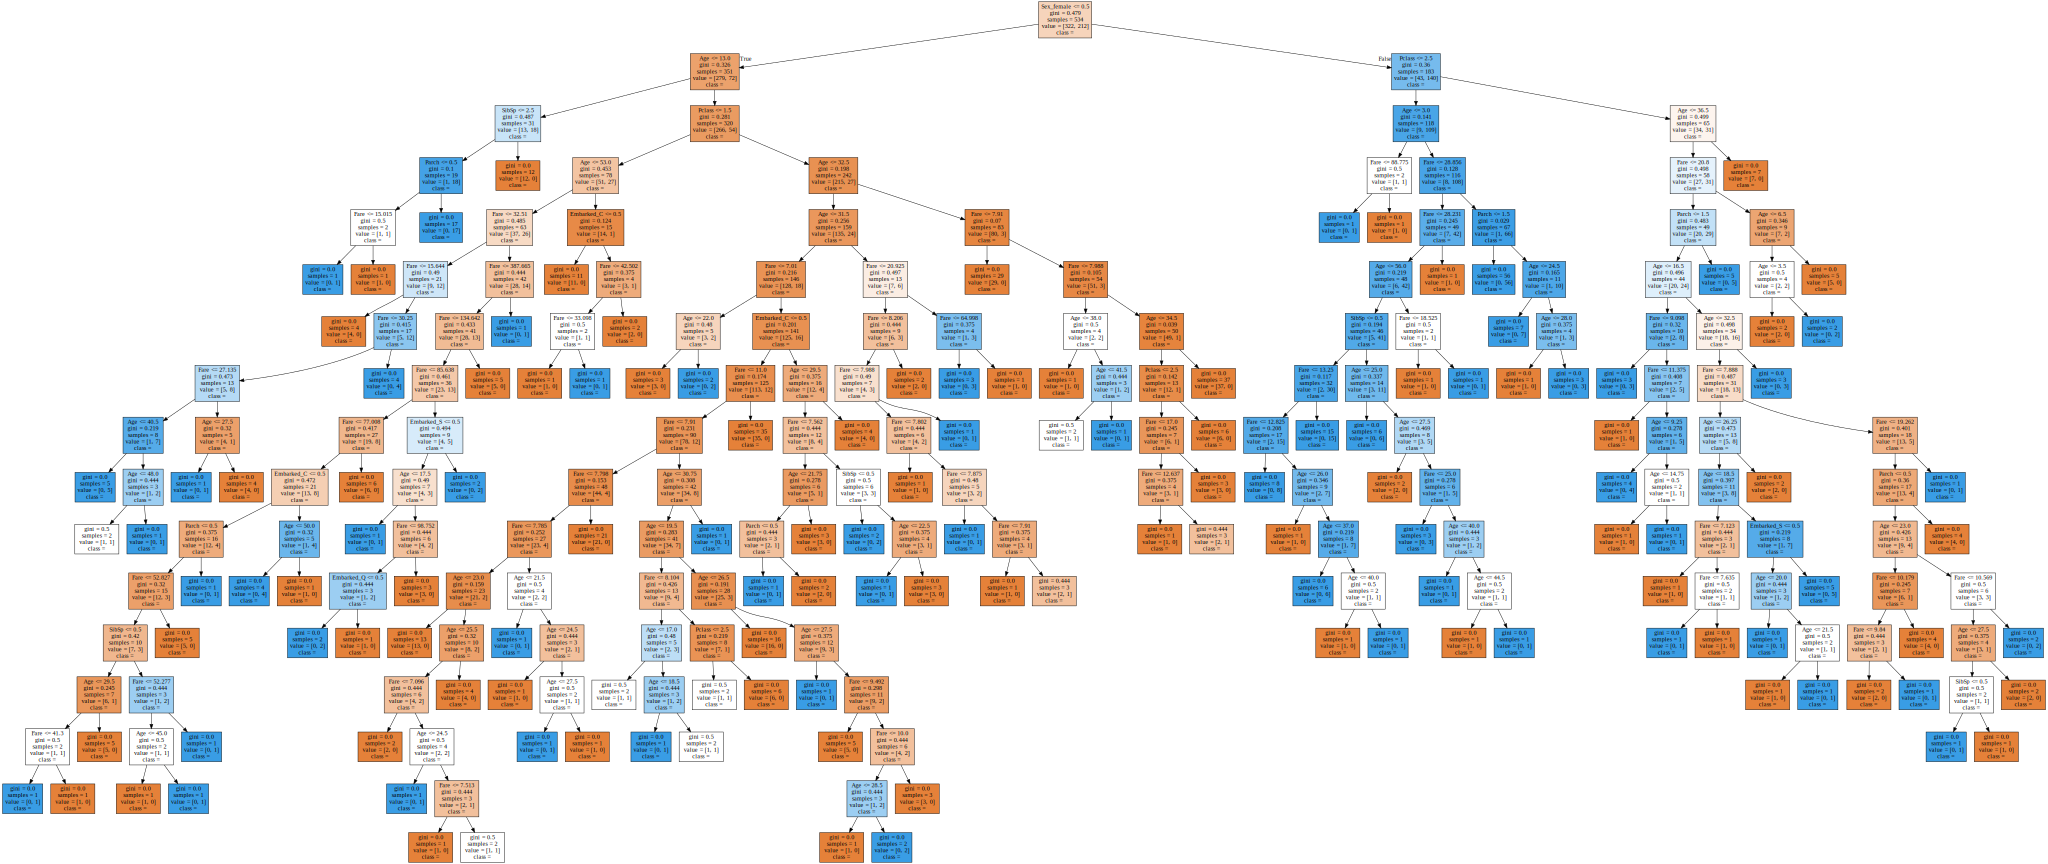

In [70]:
titDot = tree.export_graphviz(titDt,feature_names=list(titTrainX.columns),class_names=['未生还','生还'],filled=True)
titDtGraph = graphviz.Source(titDot)
titDtGraph

保存决策树图片

```python
graph.render(filename=None, directory=None, cleanup=False, format=None)
```
- `filename`：保存的文件名称
- `directory`：保存的文件所在的路径
- `cleanup`：删除中间文件
- `format`：保存的图片格式，例如`png`,`pdf`

In [71]:
titDtGraph.render(filename='titDt',directory='./img/classification/',cleanup=True,format='pdf')

'./img/classification/titDt.pdf'

#### 分类性能度量 

In [72]:
titTrainYPre = titDt.predict(titTrainX)

##### 混淆矩阵

```python
    from sklear import metrics
    metrics.confusion_matrix(y_true, y_pred)
    metrics.plot_confusion_matrix(estimator, X, y_true, values_format=None)
```
- `estimator`：训练好的分类器
- `X`：预测属性
- `value_formats`：数字的显示格式

In [73]:
from sklearn import metrics

array([[322,   0],
       [  8, 204]])

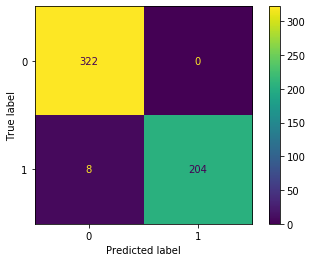

In [74]:
metrics.confusion_matrix(titTrainY, titTrainYPre)
metrics.plot_confusion_matrix(titDt,titTrainX,titTrainY,values_format='.0f')

<center><img src="./img/classification/classificationScoreN1.png" width=80%></center>

<center><img src="./img/classification/PosNeg.svg" width=60%></center>

- 精确率（precision score, 查准率）
$$precision = \frac{TP}{TP+FP}$$

- 针对某个类别的样本，不做出错误分类的能力

- 召回率（recall score，查全率）
$$recall = \frac{TP}{TP+FN}$$

- 能够识别所有属于某个真实类别的样本的能力

##### 准确率 (accuracy score)

```python
from sklearn import metrics
metrics.accuracy_score(y_true, y_pred)
```
- `y_true`：真实类标签构成的数组
- `y_pred`：分类模型预测的类标签构成的数组

In [75]:
metrics.accuracy_score(titTrainY,titTrainYPre)

0.9850187265917603

##### 召回率 （recall score）

```python
metrics.recall_score(y_true, y_pred, pos_label=1)
```

In [146]:
print(f'未生还的分类的召回率是{metrics.recall_score(titTrainY,titTrainYPre,pos_label=1)}')

未生还的分类的召回率是0.9622641509433962


In [77]:
print(f'生还的分类的召回率是{metrics.recall_score(titTrainY,titDt.predict(titTrainX),pos_label=1)}')

生还的分类的召回率是0.9622641509433962


##### 精确率（precision score）

```python
from sklearn import metrics
metrics.precision_score(y_true, y_pred, pos_label=1)
```

In [78]:
print(f'未生还的分类的精确率是{metrics.precision_score(titTrainY,titTrainYPre,pos_label=0)}')

未生还的分类的精确率是0.9757575757575757


In [79]:
print(f'生还的分类的精确率是{metrics.precision_score(titTrainY,titTrainYPre,pos_label=1)}')

生还的分类的精确率是1.0


##### $F_1$ score

- 同时考虑召回率和精确率，是召回率和精确率的调和均值

```python
from sklearn import metrics
metrics.f1_score(y_true, y_pred, pos_label=1)
```

In [80]:
print(f'未生还的分类的F1_score是{metrics.f1_score(titTrainY,titTrainYPre,pos_label=0)}')

未生还的分类的F1_score是0.9877300613496933


In [81]:
print(f'生还的分类的F1_score是{metrics.f1_score(titTrainY,titTrainYPre,pos_label=1)}')

生还的分类的F1_score是0.9807692307692307


##### P-R曲线

- 由精确率和召回率构成的图线
- x轴为召回率，y轴为精确率

```python
sklearn.metrics.plot_precision_recall_curve(estimator, X, y, pos_label)
```
- `estimator`：训练过的分类模型
- `X`：输入的属性
- `y`：标签值（二元标签）
- `pos_label`：`int`或`str`，指定类别，默认为1

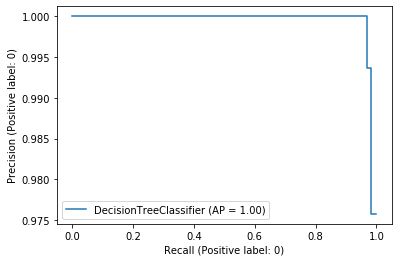

In [147]:
metrics.plot_precision_recall_curve(titDt,titTrainX,titTrainY,pos_label=0)

- `AP`：average precision score，越大越好

##### ROC曲线

- Receiver Operating Curve, 由“真正例率”（True Positive Rate）和“假正例率”（False Positive Rate）构成的曲线
$$
TPR = \frac{TP}{TP+FN}\\
FPR = \frac{FP}{FP+TN}
$$
- x轴是FPR，y轴是TPR

```python
sklearn.metrics.plot_roc_curve(estimator, X, y, pos_label)
```
- `estimator`：训练过的分类模型
- `X`：输入的属性
- `y`：标签值（二元标签）
- `pos_label`：`int`或`str`，指定类别，默认为1

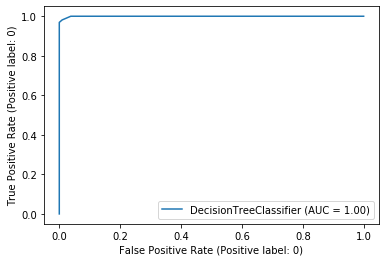

In [148]:
metrics.plot_roc_curve(titDt,titTrainX,titTrainY,pos_label=0)

- `AUC`：area under curve，曲线下面积，越大越好

- 两种曲线的选用条件
    - ROC，适用于类别均衡情况
    - PR，适用于类别不均衡情况

##### 在检验集上的分类性能

###### 生成检验集的类别预测

In [84]:
titTestYPre = titDt.predict(titTestX)

###### 分类性能指标

In [85]:
print(f'对检验集的分类准确率是{metrics.accuracy_score(titTestY,titTestYPre)}')

对检验集的分类准确率是0.7696629213483146


In [86]:
print(f'在检验集上未生还分类的召回率是{metrics.recall_score(titTestY,titTestYPre,pos_label=0)}')

在检验集上未生还分类的召回率是0.8627450980392157


In [87]:
print(f'在检验集上生还分类的召回率是{metrics.recall_score(titTestY,titTestYPre,pos_label=1)}')

在检验集上生还分类的召回率是0.6447368421052632


###### 分类性能指标-续

In [88]:
print(f'在检验集上未生还分类的精确率是{metrics.precision_score(titTestY,titTestYPre,pos_label=0)}')

在检验集上未生还分类的精确率是0.7652173913043478


In [89]:
print(f'在检验集上生还分类的精确率是{metrics.precision_score(titTestY,titTestYPre,pos_label=1)}')

在检验集上生还分类的精确率是0.7777777777777778


In [90]:
print(f'在检验集上未生还分类的F1_score是{metrics.f1_score(titTestY,titTestYPre,pos_label=0)}')

在检验集上未生还分类的F1_score是0.8110599078341014


In [91]:
print(f'在检验集上生还分类的F1_score是{metrics.f1_score(titTestY,titTestYPre,pos_label=1)}')

在检验集上生还分类的F1_score是0.7050359712230216


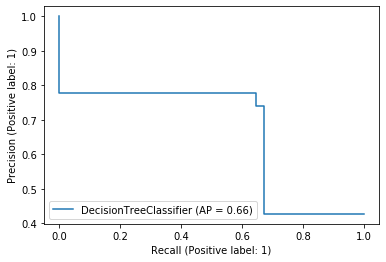

In [92]:
metrics.plot_precision_recall_curve(titDt,titTestX,titTestY)

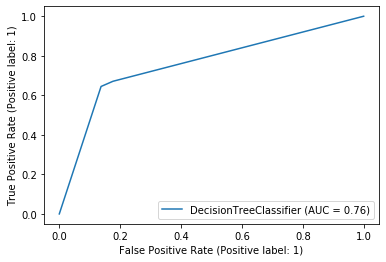

In [93]:
metrics.plot_roc_curve(titDt,titTestX,titTestY)

<p class="alert alert-danger">生成的决策树模型在<strong>训练集</strong>上的分类性能优异，但是在<strong>检验集</strong>上的分类性能一般。</p>

### 决策树的剪枝

- 为什么需要剪枝？
    + 生成的决策树过于复杂，对训练集的过度拟合
    + 决策树算法没有考虑数据中存在噪声

- 剪枝方法
    + 先剪枝
    + 后剪枝

#### 先剪枝（Forward-Pruning）

<p class="alert alert-info">提前停止树的构造而对树进行剪枝</p>

- 在决策树到达一定高度的情况下就停止树的生长
- 到达结点的样本个数小于某一个阈值可停止树的生长

```python
tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
```

- `max_depth`：`int`类型或`None`，树的最大深度。若为`None`，则所有的叶结点都只包含纯类，或者所有叶结点包含的样本数量小于`min_samples_split`
    + 值过大会导致算法对训练集的**过拟合**，而过小会妨碍算法对数据的学习
    + 推荐初始设置为3，先观察生成的决策树对数据的初步拟合状况，再决定是否要增加深度

- `min_samples_split`：`int`类型或`float`类型，划分一个内部结点需要的最少的样本数量。
    + `int`类型，`min_samples_split`为最小值，默认是2个样本
    + `float`类型，在全部样本中的占比，`ceil(min_samples_split * n_samples)`为最小值
    + 值越大，决策树的枝越少，达到一定的先剪枝效果

- `min_samples_leaf`：`int`类型或`float`类型，每个叶结点需要包含的最少的样本数量。
    + `int`类型，`min_samples_leaf`为最小值，默认是1个样本
    + `float`类型，在全部样本中的占比，`ceil(min_samples_leaf * n_samples)`为最小值
    + 值越大，决策树的枝越少，达到一定的先剪枝效果

#### 对titanic决策树先剪枝

##### 决策树模型

In [94]:
titDtForp = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=10,min_samples_leaf=10)

##### 训练

In [95]:
titDtForp.fit(titTrainX,titTrainY)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10)

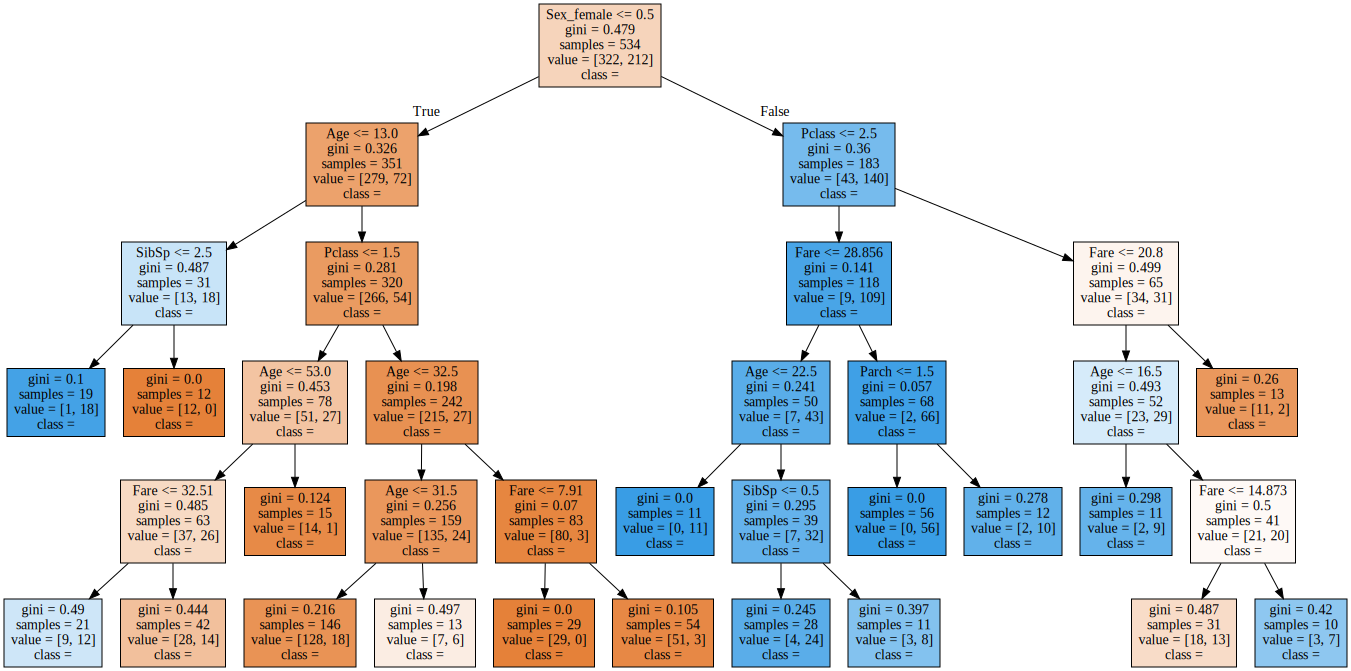

In [96]:
titDotForp = tree.export_graphviz(titDtForp,feature_names=list(titTrainX.columns),class_names=['未生还','生还'],filled=True)
titDtForpGraph = graphviz.Source(titDotForp)
titDtForpGraph

##### 决策树在训练集上的性能

In [97]:
titTrainYPreForp = titDtForp.predict(titTrainX)

In [98]:
print(f'先剪枝的决策树在训练集上的F1_score是{metrics.f1_score(titTrainY,titTrainYPreForp)}')

先剪枝的决策树在训练集上的F1_score是0.792838874680307


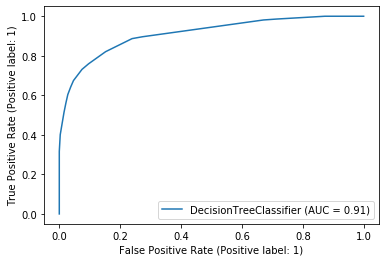

In [117]:
metrics.plot_roc_curve(titDtForp,titTrainX,titTrainY)

##### 在训练集上与未剪枝的决策树比较

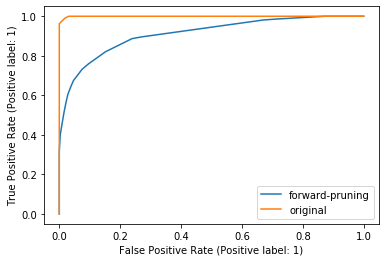

In [124]:
titTrainDisp = metrics.plot_roc_curve(titDtForp,titTrainX,titTrainY,label='forward-pruning')
metrics.plot_roc_curve(titDt,titTrainX,titTrainY,ax=titTrainDisp.ax_,label='original')
# titTrainDisp.ax_：得到绘图的轴

##### 决策树在检验集上的性能

In [99]:
titTestYPreForp = titDtForp.predict(titTestX)

In [100]:
print(f'先剪枝的决策树在训练集上的F1_score是{metrics.f1_score(titTestY,titTestYPreForp)}')

先剪枝的决策树在训练集上的F1_score是0.7703703703703703


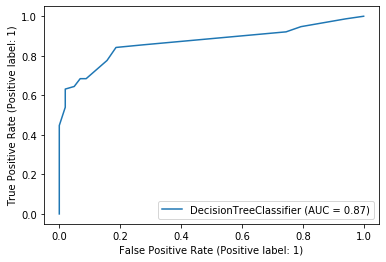

In [119]:
metrics.plot_roc_curve(titDtForp,titTestX,titTestY)

##### 在检验集上与未剪枝的决策树比较

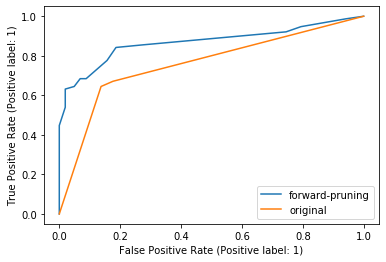

In [122]:
titTestDisp = metrics.plot_roc_curve(titDtForp,titTestX,titTestY,label='forward-pruning')
metrics.plot_roc_curve(titDt,titTestX,titTestY,ax=titTestDisp.ax_,label='original')
# titTestDisp.ax_：获得绘图的轴

#### 后剪枝（Post-Pruning）

<p class="alert alert-danger">构造完整的决策树，然后用叶结点替换那些置信度不够的结点的子树，该叶结点所应标记的类别为被替换的子树中大多数样本所属的类别。</p>

```python
tree.DecisionTreeClassifier(ccp_alpha=None)
```
- `ccp_alpha`：非负的浮点数，利用成本复杂度剪枝（cost-complexity pruning），保留那些成本复杂度值低于该参数的子树

#### 对titanic决策树后剪枝

##### 建立后剪枝模型

In [101]:
titDtPostp = tree.DecisionTreeClassifier(ccp_alpha=0.035,random_state=10)

##### 训练决策树

In [102]:
titDtPostp.fit(titTrainX,titTrainY)

DecisionTreeClassifier(ccp_alpha=0.035, random_state=10)

##### 可视化决策树

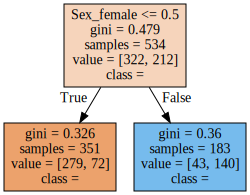

In [103]:
titDotPostp = tree.export_graphviz(titDtPostp,feature_names=list(titTrainX.columns),class_names=['未生还','生还'],filled=True)
titDtPostpGraph = graphviz.Source(titDotPostp)
titDtPostpGraph

##### 在训练集上的分类性能

In [104]:
titTrainYPrePostp = titDtPostp.predict(titTrainX)

In [105]:
print(f'后剪枝的决策树在训练集上的F1_score是{metrics.f1_score(titTrainY,titTrainYPrePostp)}')

后剪枝的决策树在训练集上的F1_score是0.7088607594936709


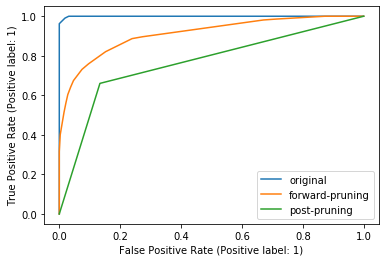

In [125]:
titTrainDisp = metrics.plot_roc_curve(titDt,titTrainX,titTrainY,label='original')
metrics.plot_roc_curve(titDtForp,titTrainX,titTrainY,label='forward-pruning',ax=titTrainDisp.ax_)
metrics.plot_roc_curve(titDtPostp,titTrainX,titTrainY,label='post-pruning',ax=titTrainDisp.ax_)

##### 在检验集上的分类性能

In [106]:
titTestYPrePostp = titDtPostp.predict(titTestX)

In [107]:
print(f'后剪枝的决策树在检验集上的F1_score是{metrics.f1_score(titTestY,titTestYPrePostp)}')

后剪枝的决策树在检验集上的F1_score是0.7236842105263158


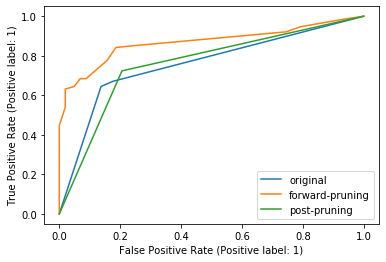

In [126]:
titTestDisp = metrics.plot_roc_curve(titDt,titTestX,titTestY,label='original')
metrics.plot_roc_curve(titDtForp,titTestX,titTestY,label='forward-pruning',ax=titTestDisp.ax_)
metrics.plot_roc_curve(titDtPostp,titTestX,titTestY,label='post-pruning',ax=titTestDisp.ax_)

##### 如何选择$ccp\_alpha$?

```python
dt.cost_complexity_pruning_path(self, X, y)
```
- 返回利用成本复杂度剪枝计算过程，字典结构，包括`ccp_alpha`数组和`impurities`数组
- `X`：训练集的预测属性
- `y`：类别列表

###### 得到剪枝的`ccp_alpha`

In [127]:
ccp_path = titDt.cost_complexity_pruning_path(titTrainX, titTrainY)
alphas = ccp_path['ccp_alphas']
ccp_path

{'ccp_alphas': array([0.        , 0.00029338, 0.00031211, 0.00037453, 0.00062422,
        0.00062422, 0.00062422, 0.00078027, 0.00104037, 0.0010856 ,
        0.00109238, 0.00109238, 0.00116521, 0.00122981, 0.00124844,
        0.00124844, 0.00124844, 0.00124844, 0.00124844, 0.00140449,
        0.00140449, 0.00140449, 0.00149813, 0.00156055, 0.00157412,
        0.00160514, 0.00160514, 0.00164081, 0.00170705, 0.0017741 ,
        0.00181234, 0.00187266, 0.00187266, 0.00189997, 0.00191167,
        0.00197064, 0.00206849, 0.00208073, 0.00224719, 0.00230481,
        0.00239757, 0.00256624, 0.00291303, 0.00298956, 0.00299625,
        0.00328737, 0.0032972 , 0.00347268, 0.00347432, 0.00389043,
        0.00390346, 0.00450767, 0.00543323, 0.00668296, 0.01215749,
        0.02134064, 0.03133794, 0.14122945]),
 'impurities': array([0.01622971, 0.01740325, 0.01771536, 0.01846442, 0.01908864,
        0.01971286, 0.02033708, 0.02111735, 0.02423845, 0.02858085,
        0.03076562, 0.03404277, 0.0375384 

###### 生成具有不同`ccp_alpha`决策树列表

In [109]:
dts = []
for ccp_alpha in alphas[:-1]:
    # alphas[:-1]去除掉最大值，因为只包含一个节点
    dt = tree.DecisionTreeClassifier(random_state=10, ccp_alpha=ccp_alpha)
    dt.fit(titTrainX, titTrainY)
    dts.append(dt)

DecisionTreeClassifier(random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0002933832709113611, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0003121098626716603, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.00037453183520599225, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0006242197253433209, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0006242197253433209, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0006242197253433209, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0007802746566791512, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0010403662089055348, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.00108559952233621, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0010923845193508116, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0010923845193508116, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0011652101539741993, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0012298060260495264, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0012484394506866417, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0012484394506866417, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0012484394506866417, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0012484394506866417, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0012484394506866417, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0014044943820224719, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0014044943820224719, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.001404494382022472, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0014981273408239697, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0015605493133583022, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0015741193073875058, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0016051364365971112, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0016051364365971112, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0016408061351881557, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.001707052930824425, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0017740981667652286, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0018123354210598092, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0018726591760299626, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0018726591760299626, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.001899974322876546, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.00191167290886392, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.001970642565753094, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0020684928153533594, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0020807324178110697, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0022471910112359574, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0023048112935753384, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.002397571217795937, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.002566236648633651, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0029130253849354967, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.002989559465707222, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0029962546816479393, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.003287374164503561, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.003297198150405835, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.003472681207314388, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.003474321291335729, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0038904278401704767, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0039034567268678502, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.004507670733711718, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.0054332267815413796, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.006682959298224711, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.012157492660556962, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.021340638220443103, random_state=10)

DecisionTreeClassifier(ccp_alpha=0.031337943542956784, random_state=10)

###### 计算每个决策树在训练集和检验集上的f1-score

In [128]:
trainScoreLst = [metrics.f1_score(titTrainY,dt.predict(titTrainX)) for dt in dts]
testScoreLst = [metrics.f1_score(titTestY,dt.predict(titTestX)) for dt in dts]

[Text(0, 0.5, 'accuracy'),
 Text(0.5, 0, 'ccp_alpha'),
 Text(0.5, 1.0, 'ccp_alpha v.s. accuracy')]

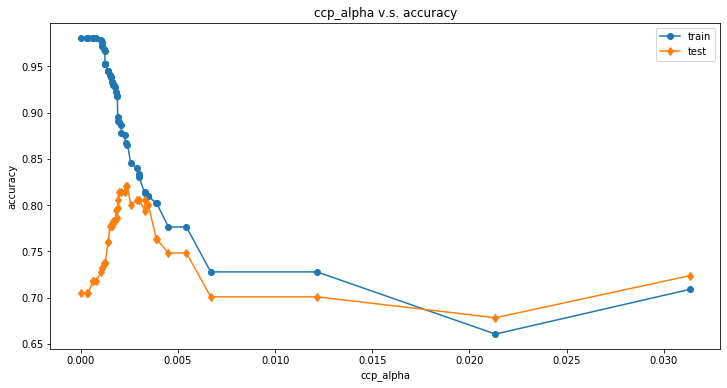

In [129]:
alphaTestDf = pd.DataFrame({'a':alphas[:-1],'train':trainScoreLst,'test':testScoreLst})
ax = alphaTestDf.plot(x='a',y='train',kind='line',figsize=(12,6),marker='o')
alphaTestDf.plot(x='a',y='test',kind='line',marker='d',ax=ax)
ax.set(title='ccp_alpha v.s. accuracy',xlabel='ccp_alpha',ylabel='accuracy')

[绘图数据点可选标记 https://matplotlib.org/3.2.1/api/markers_api.html](https://matplotlib.org/3.2.1/api/markers_api.html)

##### 选取最佳的`ccp_alpha`

In [130]:
alphaTestDf.loc[(alphaTestDf['train']>=0.8)& (alphaTestDf['test']==alphaTestDf['test'].max()),:]

,a,train,test
39,0.002305,0.866995,0.820144
40,0.002398,0.865526,0.820144


##### 可视化决策树

In [131]:
print(tree.export_text(dts[40],feature_names=list(titTrainX.columns)))

|--- Sex_female <= 0.50
|   |--- Age <= 13.00
|   |   |--- SibSp <= 2.50
|   |   |   |--- class: 1
|   |   |--- SibSp >  2.50
|   |   |   |--- class: 0
|   |--- Age >  13.00
|   |   |--- Pclass <= 1.50
|   |   |   |--- Age <= 53.00
|   |   |   |   |--- Fare <= 32.51
|   |   |   |   |   |--- Fare <= 15.64
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Fare >  15.64
|   |   |   |   |   |   |--- Fare <= 30.25
|   |   |   |   |   |   |   |--- Fare <= 27.14
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Fare >  27.14
|   |   |   |   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Age >  27.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Fare >  30.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  32.51
|   |   |   |   |   |--- Fare <= 387.66
|   |   |   |   |   |   |--- Fare <= 134.64
|   |   |   |   |   |   |   |-

## 随机森林（Random Forest）

### 集成学习

<dl class="row alert-danger">
    <dt class="col-md-3">集成学习（ensemble learning）</dt>
    <dd class="col-md-9">通过构建并结合多个分类器来完成学习任务。</dd>
</dl>

- 典型方法
    - 装袋算法（bagging）与随机森林（random forest）
    - 提升算法（boosting）：将弱分类器提升为强分类器的算法

### 装袋

<dl class="row alert-info">
    <dt class="col-md-3">自助法（bootstraping）</dt>
    <dd class="col-md-9">有放回的随机采样方法。</dd>
</dl>

- 原理：如果$N$个独立同分布（$iid$）的样本，每个样本的方差为$\sigma^2$，那么样本均值的方差为$\frac{\sigma^2}{N}$

- 装袋过程
    1. 通过自助采样，生成$B$个样本；
    2. 在每个样本上训练一个分类器$\hat{f}_b(\boldsymbol{\rm x})$；
    3. 将各个分类器合成得到最终分类器
    $$
        \hat{f}_{\text{avg}}(\boldsymbol{\rm x})=\frac{1}{B}\sum_{b=1}^B\hat{f}_b(\boldsymbol{\rm x})
    $$

### 随机森林

- 特征装袋（feature bagging），降低不同决策树之间的相关性

- 组合多个决策树，通过投票的方式确定样本所属的类别，使得整体模型在抑止过度拟合的同时，获得较好的精确度

<center><img src="./img/classification/randomForest.jpg" width=100%></center>

### 建立随机森林模型

```python
from sklearn import ensemble
ensemble.RandomForestClassifier()
```

In [136]:
rbRandTree = ensemble.RandomForestClassifier(random_state=10)

In [137]:
rbRandTree.fit(titTrainX,titTrainY)

RandomForestClassifier(random_state=10)

### 训练集分类效果检验

In [138]:
rbRandTrainYPre = rbRandTree.predict(titTrainX)

In [139]:
metrics.accuracy_score(rbRandTrainYPre,titTrainY)

0.9850187265917603

In [140]:
metrics.f1_score(rbRandTrainYPre,titTrainY,pos_label=1)

0.9809523809523809

In [141]:
metrics.f1_score(rbRandTrainYPre,titTrainY,pos_label=0)

0.9876543209876544

### 检验集分类效果检验

In [142]:
rbRandTestYPre = rbRandTree.predict(titTestX)

In [143]:
metrics.accuracy_score(rbRandTestYPre,titTestY)

0.8089887640449438

In [144]:
metrics.f1_score(rbRandTestYPre,titTestY,pos_label=1)

0.7536231884057972

In [145]:
metrics.f1_score(rbRandTestYPre,titTestY,pos_label=0)

0.8440366972477066

- 随机森林与原始决策树、先剪枝决策树、后剪枝决策树关于ROC曲线的比较

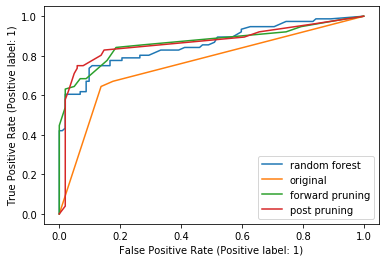

In [159]:
randTreeDisp = metrics.plot_roc_curve(rbRandTree,titTestX,titTestY,label='random forest')
metrics.plot_roc_curve(titDt,titTestX,titTestY,label='original',ax=randTreeDisp.ax_)
metrics.plot_roc_curve(titDtForp,titTestX,titTestY,label='forward pruning',ax=randTreeDisp.ax_)
metrics.plot_roc_curve(dts[40],titTestX,titTestY,label='post pruning',ax=randTreeDisp.ax_)